Import modules

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as axes
import seaborn as sns

Importing csv file and reformatting data to create pivot table

In [28]:
data=pd.read_csv('energy_use_number_10_downing_st_2017.csv',index_col='date', parse_dates=True)
days=['Mon','Tue','Wed','Thur','Fri','Sat','Sun']
data['day_of_week'] = data.index.weekday
data['day_of_week'] = pd.Categorical(data['day_of_week'].apply(lambda x: days[x]),days)
data['hour_of_day']=pd.to_datetime(data['time_of_day']).dt.hour
pivot=data.pivot_table(index='day_of_week',columns='hour_of_day',values='electricity_used_kwh')

Creating heatmap

In [4]:
a,b=int(round(pivot.values.min(),-1)),int(round(pivot.values.max(),-1))
print(a,b)


50 80


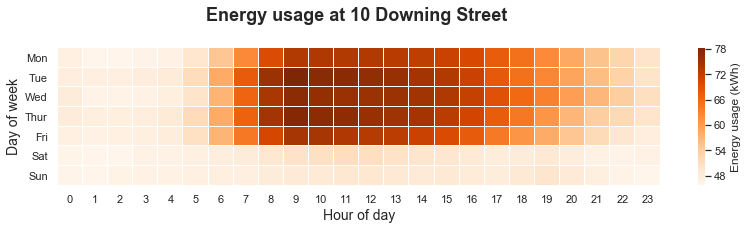

In [31]:
a=1.6
sns.set(rc={'figure.figsize':(7.2*a,2.1*a)})
_=sns.heatmap(pivot,cmap='Oranges',linewidths=0.01,cbar_kws={'label':'Energy usage (kWh)'})
plt.ylabel('Day of week',fontdict={'fontsize': 14})
plt.xlabel('Hour of day',fontdict={'fontsize': 14})
plt.title('Energy usage at 10 Downing Street \n', fontdict={'fontsize': 18,'fontweight':'bold'})
 #'fontweight' : rcParams['axes.titleweight'],
 #'verticalalignment': 'baseline',
 #'horizontalalignment': loc})
loc,labels = plt.xticks()
plt.figure(num=1,figsize=(10,5))
_.set_xticklabels(labels, rotation=0)
loc,labels = plt.yticks()
_.set_yticklabels(labels, rotation=0)
plt.tight_layout()
plt.savefig('DS_energy_usage.png')
plt.show()
